## Part 1: TF-IDF
In the following exercise, we start with the r/wallstreetbets submissions data provided in the course, and the list of the 15 stocks that was identified in the weekly exercises.

In [6]:
#imports
import pandas as pd
import numpy as np
import nltk
import re
import os
from tqdm import tqdm, tqdm_pandas
#tqdm_pandas(tqdm())
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#load data and dict
submissions = pd.read_csv(f"Week_6{os.sep}wallstreet_subs.csv", sep=',')

#Super smart method of using variables in jupyter notebooks. It pickles variables and makes it possible to
#retrieve them in other scripts :D
%store -r fdist2

no stored variable or alias fdist2


In [4]:
submissions.head()

,created_utc,title,selftext,score
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1


In [8]:
#1

#Create preprocessing function and apply it to the data
submissions['text'] = submissions['title'] + ' ' + submissions['selftext']

#Importing two different normalization methods
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
#Common english stop words
stop_words = set(stopwords.words('english'))

def preprocess(text):
    #Removing urls
    text = re.sub(r'http\S+', '', text)
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w.isalpha()]
    #Conduct stemming
    processed_text = [porter.stem(t) for t in filtered_sentence]
    return processed_text
    
submissions['tokens'] = [preprocess(x) for x in tqdm(submissions['text'])]



100%|██████████████████████████████████████████████████████████████████████████| 82242/82242 [03:05<00:00, 443.76it/s]


In [9]:
#Variable fdist2 not stored on my local computer. Hence, I have just added how it was determined:
def get_ticker(word: str)->list:
    return re.findall(r'\$[a-zA-Z]{1,5}', word)
#Setting charachter length constraint due to the following: https://www.investopedia.com/terms/s/stocksymbol.asp
submissions['ticker'] = submissions["text"].map(get_ticker)

In [14]:
#Removing dollar sign
for i in tqdm(range(len(submissions))):
    ticker_list = submissions.iloc[i, :]['ticker']
    temp = []
    for j in ticker_list:
        temp.append(re.sub(r'\$', '', j).upper())
    submissions['ticker'][i] = temp

  0%|                                                                                       | 0/82242 [00:00<?, ?it/s]/var/folders/w8/wb7dt4yd6ys326nsmh5q64200000gn/T/ipykernel_3564/2320377718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions['ticker'][i] = temp
100%|█████████████████████████████████████████████████████████████████████████| 82242/82242 [01:17<00:00, 1061.10it/s]


In [15]:
fdist2 = nltk.FreqDist((list([a for b in submissions.ticker.tolist() for a in b])))
fdist2.most_common(15)

[('SPY', 1150),
 ('TSLA', 988),
 ('SPCE', 562),
 ('PLTR', 394),
 ('MSFT', 377),
 ('ROPE', 359),
 ('AAPL', 243),
 ('AMZN', 230),
 ('NIO', 228),
 ('ZM', 227),
 ('AMD', 212),
 ('BABA', 207),
 ('GME', 202),
 ('DIS', 169),
 ('BA', 164)]

The 15 most frequent tickers yields that GME is in fact a part of the top 15 tickers as requested by the exercise description. Another noteworthy finding is that the regular expression pattern utilized in the above search does find tickers associated with stocks, however, not all of them are stocks. For instance, is the six most frequent term $ROPE, not a stock but a common phrase in r/wallstreetbets, and is used when someone has lost a lot of money on some investment (https://www.urbandictionary.com/define.php?term=%24ROPE). Thereby, illustrating that the used pattern may not be perfect.

In [17]:
submissions[submissions.ticker.astype(bool)]

,created_utc,title,selftext,score,text,tokens,ticker
5,1586171535,Jamie Dimon has joined the bull gang. CNBC: “J...,https://www.cnbc.com/2020/04/06/jamie-dimon-de...,1,Jamie Dimon has joined the bull gang. CNBC: “J...,"[jami, dimon, join, bull, gang, cnbc, jami, di...","[BAC, JPM]"
24,1586153964,Don’t sell your OTM puts tomorrow morning,I hope this doesn’t age well but tomorrow’s go...,1,Don’t sell your OTM puts tomorrow morning I ho...,"[sell, otm, put, tomorrow, morn, hope, age, we...",[ROPE]
28,1586151835,"If exponential patterns hold, we're looking at...",I modeled deaths as exponentially growing 8 da...,1,"If exponential patterns hold, we're looking at...","[exponenti, pattern, hold, look, death, model,...",[SPY]
32,1586151208,SPX: Likely to go higher this week- Don't be f...,&amp;#x200B;\n\n![img](50u8q2miv4r41)\n\nHenlo...,1,SPX: Likely to go higher this week- Don't be f...,"[spx, like, go, higher, fool, amp, img, henlo,...","[VIX, SPY, AAPL]"
35,1586150835,Buy $CMPR,Buy CMPR thank me later. $43.86 at post. Big n...,1,Buy $CMPR Buy CMPR thank me later. $43.86 at p...,"[buy, cmpr, buy, cmpr, thank, later, post, big...",[CMPR]
...,...,...,...,...,...,...,...
82173,1603294919,$AMD calls after $INTC earnings miss,"Hi, I'm an Autist reborn. After loosing a good...",1,"$AMD calls after $INTC earnings miss Hi, I'm a...","[amd, call, intc, earn, miss, hi, autist, rebo...","[AMD, INTC, SNAP, INTC, AMD]"
82192,1603910060,$ICLN $25 post election,Biden wins he’s making everything on earth cle...,1,$ICLN $25 post election Biden wins he’s making...,"[icln, post, elect, biden, win, make, everyth,...",[ICLN]
82193,1603910038,$BUD vs $TAP calls for ER play?,$SAM exploded on earnings last week. Which one...,1,$BUD vs $TAP calls for ER play? $SAM exploded ...,"[bud, vs, tap, call, er, play, sam, explod, ea...","[BUD, TAP, SAM]"
82210,1602095843,EVERYONE PLEASE BUY $WORK,IT ALMOST PASSED RESISTANCE PRICE TODAY AND I ...,1,EVERYONE PLEASE BUY $WORK IT ALMOST PASSED RES...,"[everyon, pleas, buy, work, almost, pass, resi...","[WORK, WORK]"


In [18]:
#2 
#Use stored dict and get the top 15 stocks.
top15 = [porter.stem(x[0]).lower() for x in fdist2.most_common(15)] 

#Find intersection between set of tokens and the top 15 stocks:
def inter_top_stock(tokens):
    return list(set(tokens) & set(top15))

submissions['stock'] = submissions['tokens'].apply(lambda x: inter_top_stock(x))

submissions[submissions.stock.astype(bool)]

#Exploding stock column
submissions = submissions.explode('stock')

#Fill all nan valued classes with "other"
submissions['stock'] = submissions['stock'].fillna('other')

Notice that we have choosen to conduct stemming on the top15 stocks to ensure that the stocks is in the same format as the preprocessed tokens. For instance are the stock SPY altered to SPI by the porter stemmer, which would introduce issues, when trying to determine the intersection if this precaution was not taken. The following code section will demonstrate the issue:

In [21]:
print(f'The porter stemmer alters spy to {porter.stem("spy")}')

The porter stemmer alters spy to spi


In [23]:
#3
#create corpora with important words for each class
corpora = {}
for i in top15 + ["other"]: #Also need to make document for other
    temp = submissions[submissions['stock']==i]
    corpora[i] = [item for sublist in temp['tokens'].tolist() for item in sublist]

In [25]:
corpora.keys()

dict_keys(['spi', 'tsla', 'spce', 'pltr', 'msft', 'rope', 'aapl', 'amzn', 'nio', 'zm', 'amd', 'baba', 'gme', 'di', 'ba', 'other'])

In [40]:
#4
#We could use sklearn countvectorizer but lets try to use nltk
#The 5 chosen are 'msft' 'gme' 'dis''aapl', 'amzn'
stock5 = ['msft','gme','tsla','aapl','amzn']
for i in stock5:
    fdist = nltk.FreqDist(corpora[i]) #Only gives raw counts, but we want normalized
    dict_fdist = dict(fdist)
    total_count = sum(dict_fdist.values())
    for k, v in dict_fdist.items():
        fdist[k] = v / total_count
    print(f'The 5 most frequent words associated with ${i.upper()} stock')
    print(fdist.most_common(10))
    print('\n')

The 5 most frequent words associated with $MSFT stock
[('msft', 0.015174393569685661), ('call', 0.010386105927946032), ('earn', 0.00937562796038467), ('stock', 0.00865221759724415), ('gt', 0.008324960528204393), ('go', 0.0077623080235395435), ('market', 0.007710635854743792), ('spi', 0.007348930673173533), ('buy', 0.006843691689392852), ('amp', 0.006585330845414095)]


The 5 most frequent words associated with $GME stock
[('gme', 0.022230074451532116), ('short', 0.010371141817460464), ('share', 0.009614848152349779), ('go', 0.008963939670082386), ('stock', 0.008096061693725861), ('buy', 0.007978278254077476), ('call', 0.0066702621611401435), ('get', 0.006112340604910949), ('like', 0.005982158908457471), ('gt', 0.005666003359927594)]


The 5 most frequent words associated with $TSLA stock
[('tsla', 0.018872944120664193), ('stock', 0.008993450495440147), ('call', 0.008623702217362387), ('go', 0.008147989493737953), ('buy', 0.007038744659504673), ('amp', 0.006427758175607886), ('market', 

The similarities between frequent words among the five stocks are very evident, for instance,  is 'stock' and 'earn' present as one of the most frequent words in all five documents. Furthermore, it is noticeable that it is tedious to identify the specific stock that the document is associated with, given that other stocks are listed in the top five most frequent words as well. 

Hence, utilizing the word frequency as a proxy measure or description of the content/topic of a document may sometimes be inconvenient, for example, based on the above, the count vectorization of the documents does provide insight into what the overall theme of r/wallstreetbets is, namely earning money on stocks. However, it does not successfully provide any useful understanding of how the five documents differ from each other and what specific topic each of them possesses. Thereby, demonstrating one of the common shortcomings of using term-frequency also known as count vectorization, which is that domain-specific common words, such as stock and earn, are given a greater emphasis than unique words, which entails that the domain-specific common words are attached with disproportional importance compared with their weak descriptive power of a document. TF-IDF is the extension of TF, which emphasized that unique words should be attached with greater importance, given that the TF is weighted with the inverse document frequency (IDF), which entails that domain-specific common words that have a high number of occurrences across documents are weighted with less importance.
IDF is calculated as follows:
$$ IDF(t) = log(\frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t})$$
and TF-IDF:
$$ TF\_IDF(t) = TF(t) \cdot IDF(t)$$
Consequently according to TF-IDF, a term's importance is proportional with how frequent the word occur in a document, and weighted with the inverse of how frequent the term occur in the corpus. Thus, compensating for words that are more frequent in the corpus in general.


TODO:
* After normalizing the results is a little bit different, so the above section has to be adjusted a bit. Especially the frequent words of GME, seems more proper such as "short"



In [44]:
N = len(top15) + 1  #Plus one for the 'other' group
temp = []
#Taking all terms in our five documents
for i in stock5:
    temp.append(corpora[i])
terms = set([item for sublist in temp for item in sublist])

idf_dict = {}
for term in tqdm(terms):
    counter = 0
    for i in top15 + ["other"]:
        if term in set(corpora[i]):
            counter += 1
    idf_dict[term] = np.log((N)/(counter))

100%|█████████████████████████████████████████████████████████████████████████| 20570/20570 [1:46:08<00:00,  3.23it/s]


In [46]:
#Storing IDF_dict
import pickle
with open('idf_dict.p', 'wb') as fp:
    pickle.dump(idf_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [50]:
#Loading IDF_dict
with open('idf_dict.p', 'rb') as fp:
    idf_dict = pickle.load(fp)

The choice of log base is arbitrary due to the fact that changing the base only would correspond to multiplying with a given factor due to the following equality:
$$log_{b}(x) = \frac{log_{k}(x)}{log_{k}(b)}$$,
which essentially would entail that all terms are multiplied with the same constant, and thereby resulting in no relative difference. Hence, the choice of base is arbitrary. The log base used in this assingment was therefore numpy's default log base which is the natural logarithm.

In [45]:
#5
for i in stock5:
    print(f'###########\n## {i} ##\n##########')
    fdist = nltk.FreqDist(corpora[i])
    dict_fdist = dict(fdist)
    total_count = sum(dict_fdist.values())
    for k, v in dict_fdist.items():
        fdist[k] = v / total_count
    print(f'The 10 most frequent words associated with {i.upper()} stock:')
    print(fdist.most_common(10))
    fdist = dict(fdist)
    print(f'\nThe top 10 TF-idf words associated with {i.upper()} stock:')
    tf_idf_dict = {}
    for key in fdist:
        tf_idf_dict[key] = idf_dict[key] * fdist[key]
    print(sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True)[:10])
    print('\n')

###########
## msft ##
##########
The 10 most frequent words associated with MSFT stock:
[('msft', 0.015174393569685661), ('call', 0.010386105927946032), ('earn', 0.00937562796038467), ('stock', 0.00865221759724415), ('gt', 0.008324960528204393), ('go', 0.0077623080235395435), ('market', 0.007710635854743792), ('spi', 0.007348930673173533), ('buy', 0.006843691689392852), ('amp', 0.006585330845414095)]

The top 10 TF-idf words associated with MSFT stock:
[('msft', 0.000979332920146982), ('spi', 0.00047428911758915513), ('macrohard', 0.00023877612076128444), ('tsla', 0.0001674833446486704), ('cvm', 0.00015359534161349598), ('jedi', 0.00014204482980251562), ('aapl', 0.0001337643526950664), ('amzn', 0.00010967935844249212), ('smead', 0.000107449254342578), ('amd', 0.00010597397471132684)]


###########
## gme ##
##########
The 10 most frequent words associated with GME stock:
[('gme', 0.022230074451532116), ('short', 0.010371141817460464), ('share', 0.009614848152349779), ('go', 0.00896393

Indeed the words associated with the highest TF-IDF value appears to be more descriptive of the stocks, which is reflected by a more diverse set of frequent terms describing the stocks. 

(Following might change after the updates): Most of the words are slang found in this subreddit. For instance 'speedrun' refers to day-to-day trading.

### (Christian's suggestion ->)
As also addressed in previous sections, IDF attempts to quantify the amount of information a specific word contains about the document in which it appears, by assuming that a reasonable proxy measure is how unique a word is in the corpus of documents. Hence, the name Inverse Document Frequency. The effect and purpose of the IDF weighting are also evident in the above examples and are expressed by not having words such as "buy", "market", "stock" and "earn" among the top 10 TF-IDF words, which were in general among all of the top 10 TF words. (Let's also have a discussion of when to use TF-IDF and when TF is most proper to use, I would probably argue that when you want to know what an entire corpus is about TF is to be prefered, but when you want to know something about specific documents then TF-IDF is to be prefered.)

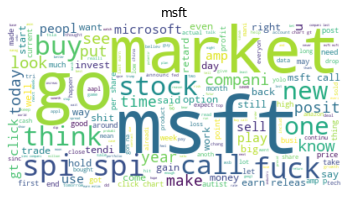

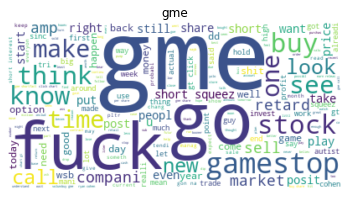

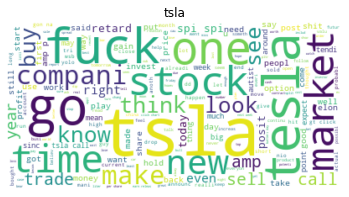

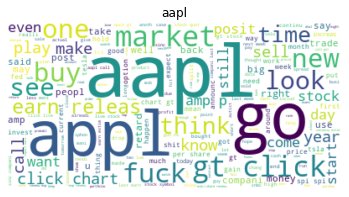

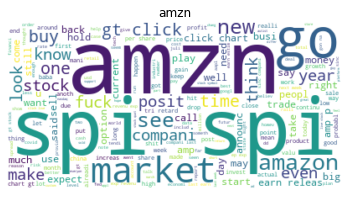

In [47]:
#6
#load modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Using word frequencies
for i in stock5:
    wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(corpora[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i)
    plt.show()

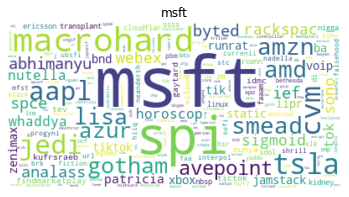

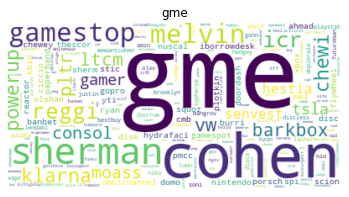

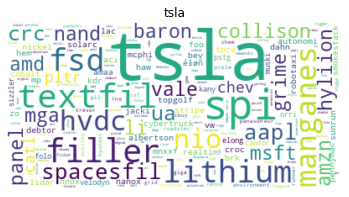

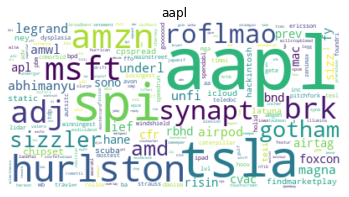

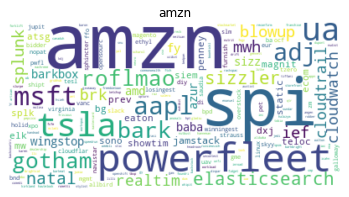

In [48]:
#Using word tf-idf weighting
for i in stock5:
    fdist = dict(nltk.FreqDist(corpora[i]))
    tf_idf_dict = {}
    for key in fdist:
        tf_idf_dict[key] = idf_dict[key] * fdist[key]
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(tf_idf_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i)
    plt.show()

It is a super nice way of representing our words. We can see that many of the comments include mentions of other stocks such as SPY (replaced by spi in the stemming process) or DJIA. More interestingly, it seems people were quite sure that there would happen something to AAPL, MSFT and AMZN once Palentir (PLTR) released Gotham, a software system for the US government. So we do indeed catch some interesting trends in these word clouds.

## Part 2: Sentiment analysis

In [71]:
#import libraries
import datetime as dt
from collections import Counter

#get data
daily_happiness = pd.read_csv(f'Week_7{os.sep}daily_happiness_without_stop.csv').set_index("date")
daily_words = pd.read_csv(f'Week_7{os.sep}daily_words.csv').set_index("date")

#Convert the index to datetime format from string.
daily_happiness.index = pd.to_datetime(daily_happiness.index)
daily_words.index = pd.to_datetime(daily_words.index)

#Loading in hedonometer
labMT = pd.read_csv(f'Week_7{os.sep}Hedonometer.csv')


NOTICE: The function to calculate the happiness score is not present in this notebook, but can be found under week7, given that the assignment does not ask us to provide it. However, we do think that it is important to emphasise that we have choosen not to conduct stemming or any other sort of normalization of the texts, due to the following from the paper *Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter*:

**"we avoid stemming words, i.e., conflating inflected words with their root form, such as all conjugations of a specific verb. For verbs in particular, by focusing on the most frequent words, we obtained scores for those conjugations likely to appear in texts, obviating any need for stemming."**

Hence, we decided that it would be more appropriate to avoid normalization, as an attempt to have the words in the same inflectional form as in the provided hedonometer. Furthermore, stemming may also result in altering the sentiment of a word, for instance, demonstrated by the following example: 

In [57]:
print(f'Armed with associated happiness score {Hedonometer.loc[["armed"]]["Happiness Score"].values} becomes -> {porter.stem("armed") } with associated happiness score {Hedonometer.loc[["arm"]]["Happiness Score"].values}')

Armed with associated happiness score [3.84] becomes -> arm with associated happiness score [5.5]


Hence, stemming and other forms of normalization in sentiment analysis may alter the estimated sentiment. We did however decide that it was sensible to remove stopwords from the text to avoid neutral words having too great of importance in the average happiness. 

In [64]:
from datetime import datetime, timedelta
d_word = ""
min_h = daily_happiness["daily_happiness"].min()
date_min_h = daily_happiness[daily_happiness["daily_happiness"] == min_h].index[0]
# Maybe we should use 20 February 2020, stock market crash day.
d_min = date_min_h - timedelta(days = 7) # 7 days before as reference

In [75]:
date_min_h

Timestamp('2020-11-06 00:00:00')

In [65]:
# lets define two lists
import ast
import itertools
l = ast.literal_eval(daily_words["document"].loc[date_min_h])
l_ref = np.concatenate(daily_words[(daily_words.index < date_min_h) & (daily_words.index > d_min)].values)
l_ref = list(itertools.chain.from_iterable([ast.literal_eval(x) for x in l_ref]))

In [66]:
from collections import Counter
#Counter(l) # counts how many time a word appears.
# Want to count the relative freq
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l)) for item in Counter(l_ref).items()])
p

{'volatility': 0.0008978675645342312,
 'is': 0.01840628507295174,
 'coming': 0.0008978675645342312,
 'back': 0.002244668911335578,
 'how': 0.00202020202020202,
 'election': 0.0053872053872053875,
 'news': 0.0015712682379349046,
 'overshadowing': 0.0002244668911335578,
 'potential': 0.0004489337822671156,
 'market': 0.0029180695847362513,
 'turmoil': 0.0002244668911335578,
 'section': 0.0008978675645342312,
 'the': 0.04983164983164983,
 'a': 0.027384960718294053,
 'republican': 0.0008978675645342312,
 'senate': 0.0013468013468013469,
 'first': 0.0013468013468013469,
 'and': 0.020650953984287318,
 'foremost': 0.0002244668911335578,
 'to': 0.03164983164983165,
 'explain': 0.0004489337822671156,
 'why': 0.001122334455667789,
 'puts': 0.002244668911335578,
 'got': 0.001122334455667789,
 'melted': 0.0002244668911335578,
 'this': 0.010101010101010102,
 'week': 0.004264870931537598,
 'was': 0.004489337822671156,
 'key': 0.0006734006734006734,
 'component': 0.0002244668911335578,
 'of': 0.02603

In [67]:
# Top 10 values
sorted(p.items(), key = lambda x: x[1], reverse = True)[:10]

[('the', 0.04983164983164983),
 ('to', 0.03164983164983165),
 ('a', 0.027384960718294053),
 ('of', 0.026038159371492706),
 ('and', 0.020650953984287318),
 ('is', 0.01840628507295174),
 ('i', 0.014141414141414142),
 ('in', 0.01324354657687991),
 ('that', 0.011896745230078564),
 ('it', 0.010774410774410775)]

In [68]:
all_tokens = set(p.keys()).union(set(p_ref.keys()))
dp = dict([(token, p.get(token, 0) - p_ref.get(token, 0)) for token in all_tokens])
dp

{'questions': -0.0015712682379349046,
 'politicians': -0.0002244668911335578,
 'aligners': -0.0002244668911335578,
 'smartly': -0.0002244668911335578,
 'families': -0.0004489337822671156,
 'neglecting': -0.0002244668911335578,
 'hub': -0.0002244668911335578,
 'shaded': -0.0002244668911335578,
 'be': -0.0924803591470258,
 'jack': -0.001122334455667789,
 'wii': -0.0004489337822671156,
 'marketplaces': -0.0004489337822671156,
 'smart': -0.003367003367003367,
 'race': -0.00202020202020202,
 'geo': -0.0015712682379349046,
 'history': -0.0031425364758698093,
 'myself': -0.0024691358024691358,
 'opportunities': -0.00202020202020202,
 'diego': -0.0002244668911335578,
 'slower': -0.0002244668911335578,
 'rebounded': -0.0002244668911335578,
 'inc': -0.0006734006734006734,
 'local': -0.001122334455667789,
 'pointy': -0.0002244668911335578,
 'halts': 0.0002244668911335578,
 'remote': -0.0004489337822671156,
 'capital': -0.0038159371492704824,
 'whatever': -0.0022446689113355778,
 'characters': -0.

In [69]:
sorted(dp.items(), key = lambda x: x[1], reverse = True)[0:10]

[('lending', 0.00202020202020202),
 ('pfizer', 0.0015712682379349046),
 ('standards', 0.0015712682379349046),
 ('tightening', 0.0013468013468013469),
 ('imports', 0.001122334455667789),
 ('exports', 0.001122334455667789),
 ('qe', 0.0008978675645342312),
 ('contagiousness', 0.0006734006734006734),
 ('weather', 0.0006734006734006734),
 ('coupled', 0.0006734006734006734)]

In [72]:
labMT_dict = dict(zip(labMT["Word"].values, labMT["Happiness Score"].values))
h = dict([(token, labMT_dict.get(token,np.nan) - 5) for token in all_tokens])
# We shift all the happiness score by -5

In [73]:
# Compute the product of delta p and h
dPhi = [(token, h[token]  *dp[token]) for token in all_tokens if not np.isnan(h[token])]
sorted(dPhi, key = lambda x:np.abs(x[1]), reverse=True)[:10]

[('i', -0.2955151515151515),
 ('you', -0.20903254769921442),
 ('earnings', -0.15385858585858583),
 ('like', -0.11112457912457911),
 ('in', -0.10987654320987655),
 ('my', -0.10623569023569025),
 ('will', -0.10280134680134677),
 ('all', -0.09940740740740737),
 ('on', -0.09314478114478107),
 ('up', -0.087003367003367)]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


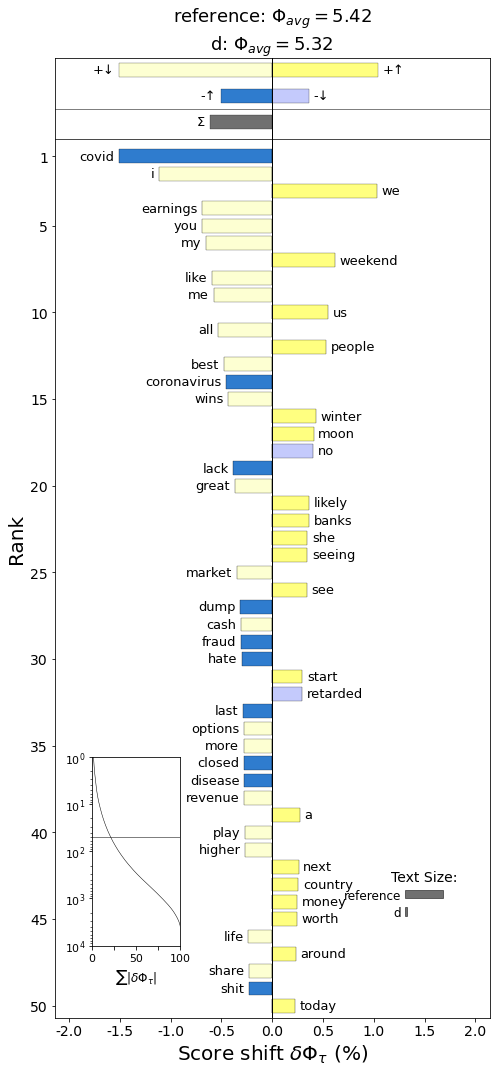

<AxesSubplot:title={'center':'reference: $\\Phi_{avg}=$5.42\nd: $\\Phi_{avg}=$5.32'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [74]:
import shifterator as sh
sentiment_sh = sh.WeightedAvgShift(type2freq_1 = p_ref, type2freq_2 = p, type2score_1 = labMT_dict, reference_value = 5)
sentiment_sh.get_shift_graph(detailed = True, system_names = ["reference", "d"])

### Write some comments xDD

### Part 3: Communities for the Zachary Karate Club Network

In [84]:
#set font
import matplotlib as mpl
import networkx.algorithms.community as nx_comm
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

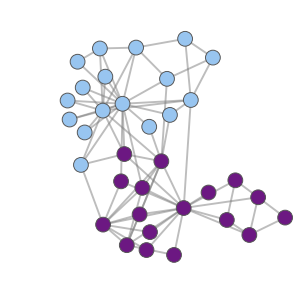

In [81]:
#1
%matplotlib inline
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt

#Create graph and get node attributes for nw:
G = nx.karate_club_graph()
for k, v in G.nodes(data=True):
    v['group'] = v['club']; del v['club']

with plt.style.context('ggplot'):
    network, config = nw.interactive.visualize(G, plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)

In [82]:
#2
#Reload graph in order to keep club split called 'club'
G = nx.karate_club_graph()

#modularity function
def modularity(G: G, partitioning: list) -> float:
    L = len(G.edges())
    M = 0
    for partion in partitioning:
        subgraph = G.subgraph(partion).copy()
        L_c = subgraph.number_of_edges()
        K_c = sum(G.degree[node] for node in subgraph.nodes())
        M += (L_c/L) - (K_c/(2*L))**2
    return M

\#3
(Måske fjerne den første del?)

Modularity Q is mathematically defined as follows:
$$a_{i}=\sum_{j} e_{ij}$$
$$Q = \sum_{i} e_{ii} - a_{i}^2$$

a is essentially the fraction of edges that connects to vertices within the community and Q is the trace minus a. The underlying idea is to say that the trace should be $e_{ij} = a_{i}a_{j}$ if the communities were random. Hence, we say the trace minus what the trace would be if it was a random network. Thus, a high modularity means that the network has fewer than expected edges between communities, which entails that the network might have strong partitions and thereby contain true communities. Thus, modularity is a measure of how well a partition divides truly divides the network into communities. Hence, a high modularity for a given partition indicates that the corresponding community structure is appropriate to the true nature of the network structure.

In [85]:
#4
#Making optimal partition based on club splits
hi = {key for (key, value) in dict(nx.get_node_attributes(G, "club")).items() if value == 'Mr. Hi'}
officer = {key for (key, value) in dict(nx.get_node_attributes(G, "club")).items() if value == 'Officer'}

print('Modularity: ',modularity(G, [hi, officer]))
print('\nModularity with nx: ',nx_comm.modularity(G, [hi, officer]))

Modularity:  0.3582347140039447

Modularity with nx:  0.3582347140039448


In [86]:
#5
import random
def conf_model(G: G)->G:
    G_conf = G.copy()
    edges = list(G_conf.edges)
    source_nodes = [x[0] for x in edges]
    target_nodes = [x[1] for x in edges]
    
    #Concatenate stubs
    stubs = source_nodes + target_nodes
    
    #Shuffle stubs
    random.shuffle(stubs)
    
    #Get new edges
    new_edges = list(zip(stubs[0::2], stubs[1::2]))
    
    #Create a multigraph in order to accomodate multiple links
    G_conf = nx.MultiGraph()
    
    #Add edges
    G_conf.add_edges_from(new_edges)
    return G_conf

In [264]:
#6
G_conf = conf_model(G)
print('Degree of configurated graph: ',sum(dict(G_conf.degree()).values()))

print('\nDegree of real graph: ',sum(dict(G.degree()).values()))

Degree of configurated graph:  156

Degree of real graph:  156


In [87]:
#Optional!!!
#Define double edge swapping function
def double_edge_swap(G: G, N: int)->G:
    G_random = G.copy()
    num_swaps = 0
    while num_swaps < N:
        edges = list(G_random.edges)
        non_edges = list(nx.non_edges(G_random))
        (u,v), (x,y) = random.choices(edges, k=2) 
        if u==x or v==y: #Skipping due to same source or target
            continue 
        if (u,x) in non_edges and (v, y) in non_edges:
            G_random.add_edges_from([(u,x), (v, y)])
            G_random.remove_edges_from([(u, v), (x, y)])
            num_swaps += 1
    return G_random

G_des = double_edge_swap(G, 100)
print('Degree of double edge swapped graph: ',sum(dict(G_des.degree()).values()))

print('\nDegree of real graph: ',sum(dict(G.degree()).values()))

Degree of double edge swapped graph:  156

Degree of real graph:  156


The degrees are equal, yes. This is because we essentially just take all the edges and remove the links (while keeping the nodes). Then we shuffle the nodes (keeping the number of nodes intact) and create new links from node pairs. The degree wouldn't change because of any of these operations.

In [271]:
#7
#We will use the configurate model :)
conf_mods = []
for _ in tqdm(range(1000)):
    G_conf = conf_model(G)
    conf_mods.append(modularity(G_conf, [hi, officer]))

100%|██████████| 1000/1000 [00:01<00:00, 850.85it/s]


In [273]:
#8
print(f'The average modularity: {np.mean(conf_mods)}\nThe std: {np.std(conf_mods)}')

The average modularity: -0.0028678500986193942
The std: 0.057974302271488164


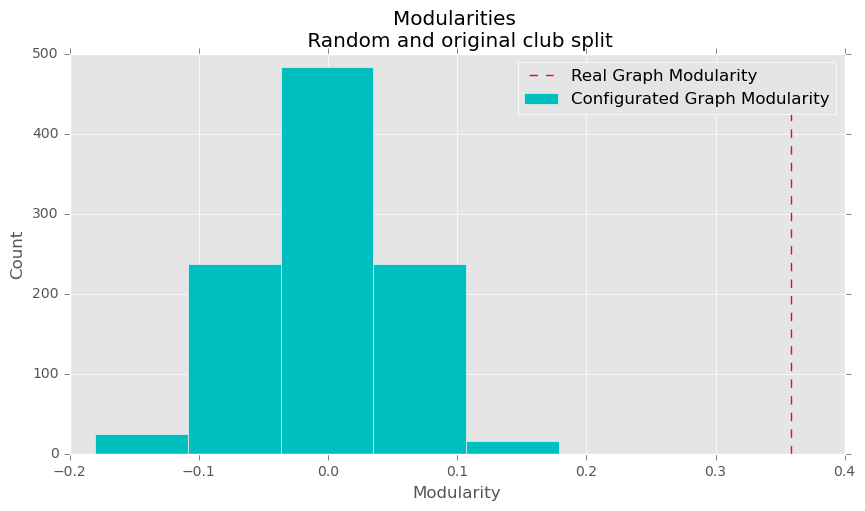

In [280]:
#9
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.hist(conf_mods, label="Configurated Graph Modularity", bins=5, color='c')
ax.axvline(modularity(G, [hi, officer]), linestyle='--', color='r', label="Real Graph Modularity")
ax.set_title("Modularities \n Random and original club split")
ax.set_xlabel("Modularity")
ax.set_ylabel("Count")
ax.legend()
plt.show()

\#10

Yes, the true split is a good split. This can be seen because the red line is on the far right of the x-axis and not within the cyan distribution. This tells us that our real graph has a better modularity than all of our random graphs which makes sense given the clustering property of real graphs (and especially the karate club graph). 

By preserving the nodes' degrees, we made sure that our random graphs have as many edges and as "spread out" as the true graph. By shuffling the edges we can see that the true graph does indeed have better clustering than a randomly shuffled graph would!

In [90]:
#11
from community import community_louvain
partition = community_louvain.best_partition(G)
partition_dict = {item: set() for (key, item) in partition.items()}
for (key, item) in partition.items():
    partition_dict[item].add(key)
print('True split: ',modularity(G, [hi, officer]))
print('\nLouvain split: ', modularity(G, list(partition_dict.values())))

True split:  0.3582347140039447

Louvain split:  0.4151051939513477


The modularity is in fact higher for the communities found by the louvain algorithm, which indicates that it is in fact more probable that there is four communities rather than two. This suggest that there is in fact subcommunities within the two karate clubs, which could be believable. The dataset is made on who the individuals interact with outside the karate club, and it could very well be the case that people have joined the karate clubs from different sub communities, which is something we aswell can recognize, I am more likely to join the same karate club as my friend is apart of.

Confusion matrix: 
 [[11.  0.  5.  1.]
 [ 0.  4.  0. 13.]]


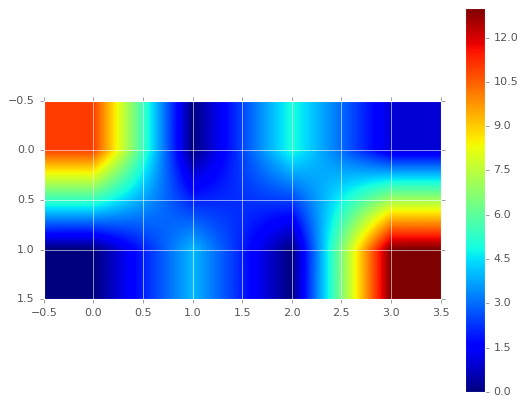

In [288]:
#12
D = np.zeros((2, len(partition_dict.keys())))
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D[i, j] = sum([1 for x in partition_dict[j] if x in [hi, officer][i]])
print('Confusion matrix: \n',D)

#extra, because Felix just learned this command:
plt.imshow(D)
plt.colorbar()
plt.show()

The confusion matrix shows us that the two partitions (Officer and Mr. Hi) are spread into four partitions by the Louvain algorithm. Mr. Hi has been split into three different partitions while Officer seems to fit with two. With the exception of one person (D[0,3]), the two splits seem to agree with each other (in not mixing the nodes). So we know that the true split is quite good actually.

In [91]:
#13?
#Using the reciprocal graph because louvain assumes undirectedness
GME_graph = nx.read_gexf(f"Week_8{os.sep}reciprocal_reddit_community_GME.gexf")
communities = community_louvain.best_partition(GME_graph)
print(f'The amount of communities: {max(list(communities.values())) + 1}')

The amount of communities: 552


Text(0.5, 1.0, 'Size of each community in GME network')

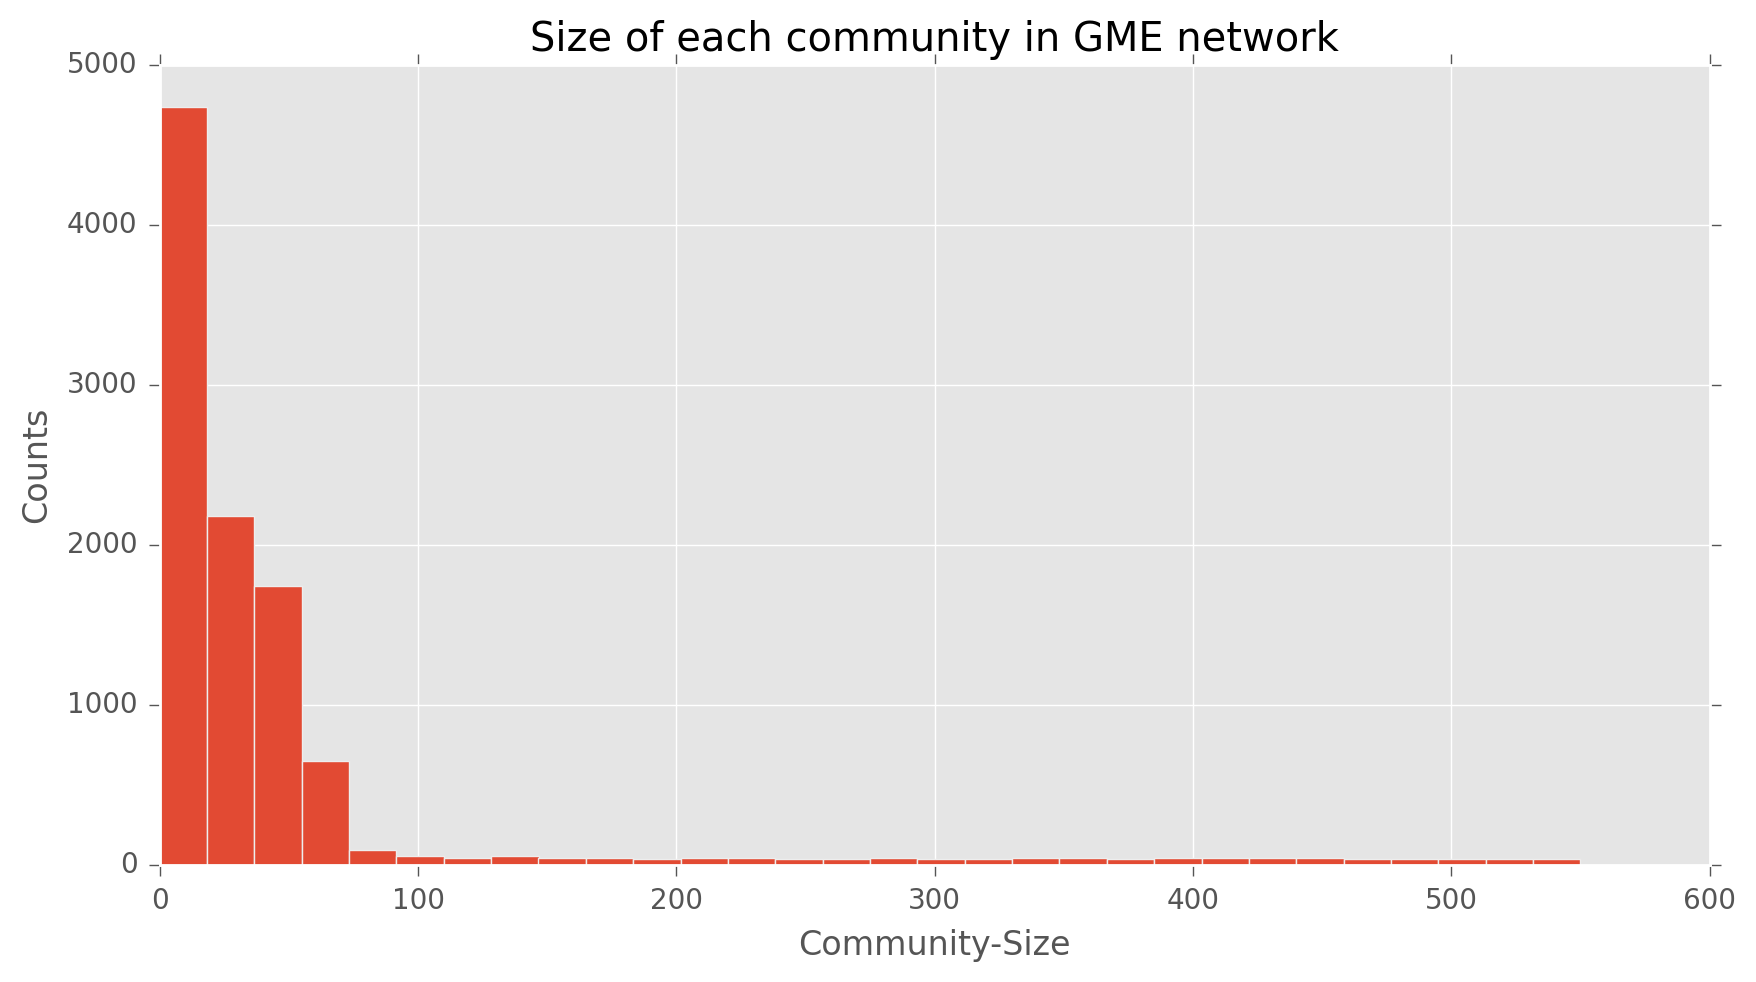

In [293]:
nx.set_node_attributes(GME_graph, communities, "louvain_community")
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.hist(communities.values(), bins=30)
ax.set_ylabel("Counts")
ax.set_xlabel("Community-Size")
ax.set_title("Size of each community in GME network")

We see a heavy tail in the distribution. Hence, we could try a logarithmic binning and scale:

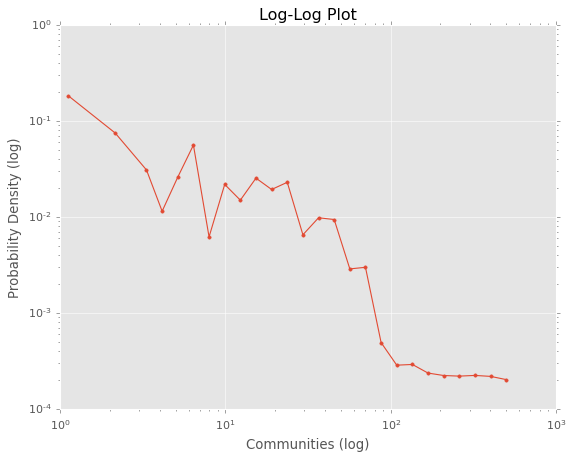

In [301]:
fig, ax = plt.subplots()
xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j > 0])
ax.plot(xx, yy, marker='.')
ax.set_ylabel("Probability Density (log)")
ax.set_xlabel("Communities (log)")
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Log-Log Plot')
plt.show()

Does not quite seem to follow a power law given that the tail is not as heavy as expected. Subsequently lets calculate the modularity:

In [303]:
community_dict = {item: set() for (key, item) in communities.items()}
for (key, item) in communities.items():
    community_dict[item].add(key)
print('Modularity of the GME network: ',modularity(GME_graph, list(community_dict.values())))

Modularity of the GME network:  0.6115891079013841


We are then asked if it is signficiantly different from zero, which meerely by inspection of the computed modularity seems reasonable. However, to ensure that the there is in fact less edges between partionions than one might expect at random, we will as previously compare with the actual computed modularity with a "randomly" computed modularity:

In [92]:
random_mods = []
for _ in tqdm(range(1001)):
    G_random = double_edge_swap(GME_graph, GME_graph.number_of_edges() + 10)
    random_mods.append(modularity(G_random, list(community_dict.values())))

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.hist(random_mods, label="Random Modularity", bins=5, color='c')
ax.axvline(modularity(GME_graph, list(community_dict.values())), linestyle='--', color='r', label="Actual Modularity")
ax.set_title("Modularities \n Random and original club split")
ax.set_xlabel("Modularity")
ax.set_ylabel("Count")
ax.legend()
plt.show()

  0%|                                                                                        | 0/1001 [00:32<?, ?it/s]


KeyboardInterrupt: 

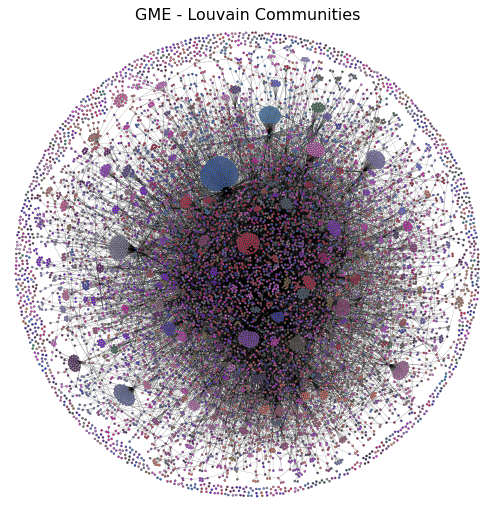

In [313]:
#14?
with plt.style.context('ggplot'):
    network, config = nw.visualize(nw.get_filtered_network(GME_graph, node_group_key='louvain_community'), plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)
    ax.set_title("GME - Louvain Communities")

In [314]:
#Extra:
from infomap import Infomap
GME_graph_temp = nx.convert_node_labels_to_integers(GME_graph).copy()
im = Infomap("--two-level")
for edge in GME_graph_temp.edges():
    im.addLink(*edge)
im.run()
print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
print("Result")
print("\n#node module")
communities = {}
for node in im.tree:
    if node.is_leaf:
        #print(node.node_id, node.module_id)
        communities[node.node_id] = node.module_id
nx.set_node_attributes(GME_graph_temp, communities, 'info_community')

In [ ]:
with plt.style.context('classic'):
    network, config = visualize(netwulf.get_filtered_network(GME_graph_temp, node_group_key='info_community'), plot_in_cell_below=False)
    fig, ax = netwulf.draw_netwulf(network)
    ax.set_title("GME - Infomap Communities")